# ADS - Network analysis module, homework 1

In [39]:
# !pip install scipy==1.8.0 --user

In [1]:
#add necessary libraries
import pycombo # combo community detection package
import networkx as nx #library supporting networks
from networkx.algorithms import community
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


## Task 1. Analysis of Les Miserables network 

In [4]:
#uploading the classical coappearance network of characters in the novel "Les Miserables" to analyze
#first download the data from https://raw.githubusercontent.com/CUSP2021ADS/Data/main/ClassicNet/lesmis.gml
G = nx.read_gml('lesmis.gml') 

### Q1. Visualize the network below with node labes and sizes proportional to node degree

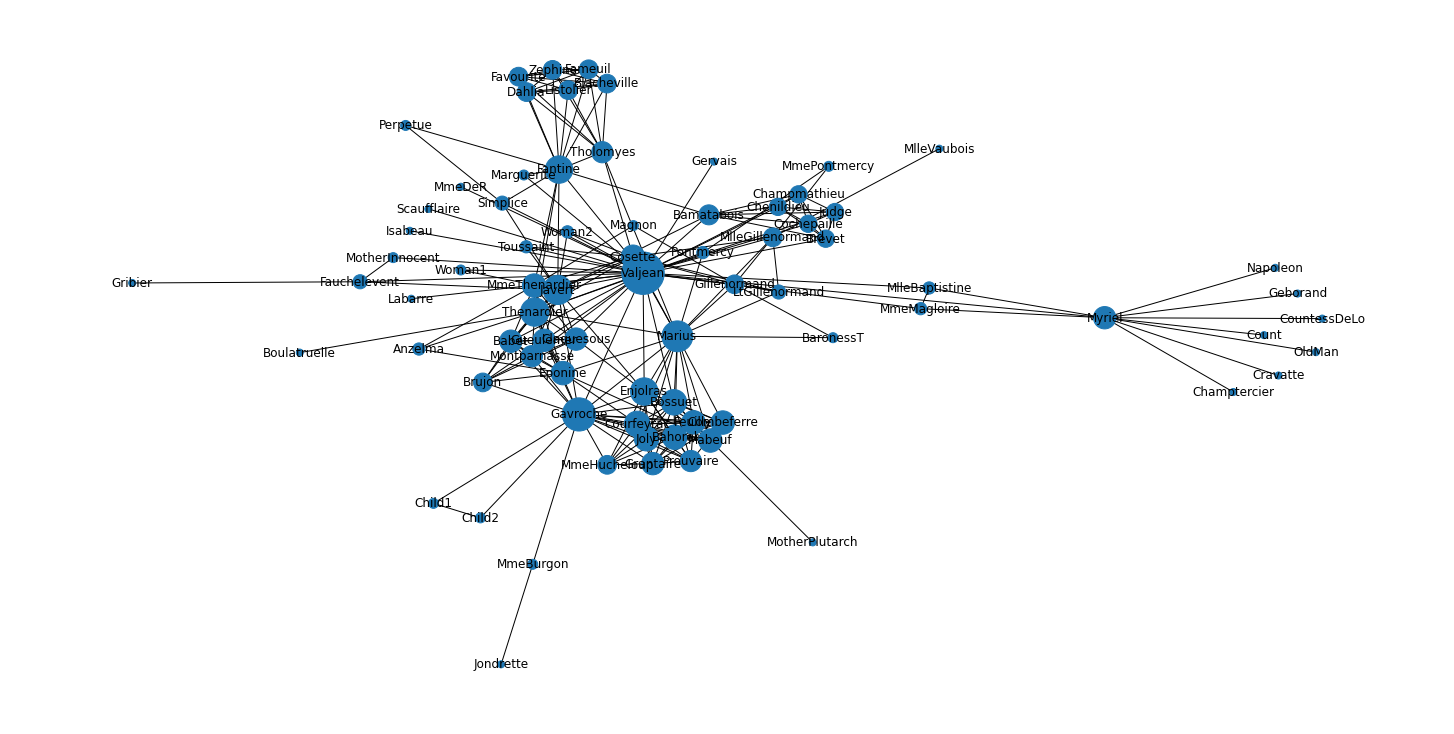

In [5]:
fig = plt.figure(1, figsize=(20, 10))
np.random.seed(2011) #fix the origin of random generator 
nx.draw(G,node_size=50*np.array(list(dict(G.degree()).values())),with_labels=True)

In [6]:
G.nodes

NodeView(('Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup'))

### Q2. Report top nodes by centrality
Print the node labels and corresponding centrality measure for top 5 nodes in terms of

a) degree centrality;

b) betweenness centrality;

c) closeness centrality;

In [7]:
# defining a function to return the top n values in a dict 
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)
    for i in range(0,tn):
        print('{0}|{1} : {2}'.format(i+1,ind[i],d[ind[i]]))
    return ind

In [8]:
# a) degree centrality;

mc1=dict(nx.degree(G))
ind1=topdict(mc1,5)

1|Valjean : 36
2|Gavroche : 22
3|Marius : 19
4|Javert : 17
5|Thenardier : 16


In [9]:
# b) betweenness centrality;

mc2 = nx.betweenness_centrality(G)
ind2=topdict(mc2,5)

1|Valjean : 0.5699890527836184
2|Myriel : 0.17684210526315788
3|Gavroche : 0.16511250242584766
4|Marius : 0.132032488621946
5|Fantine : 0.12964454098819422


In [10]:
# c) closeness centrality

mc3 = nx.closeness_centrality(G)
ind3=topdict(mc3,5)

1|Valjean : 0.6440677966101694
2|Marius : 0.5314685314685315
3|Thenardier : 0.5170068027210885
4|Javert : 0.5170068027210885
5|Gavroche : 0.5135135135135135


### Q3. Analyze stability of Pagerank centrality
Analyze the impact of parameter $\alpha$ in pagerank centrality for the given network: compare top 5 nodes for different values of $\alpha=0.95, 0.9, 0.85, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1$ and point out an interval for which the ranking remains mostly stable.

In [15]:
alpha = [0.95,0.9,0.85,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
for i in alpha:
    mc4 = nx.pagerank(G,i)
    print('\n')
    print("For alpha value = {}".format(i))
    ind4=topdict(mc4,5)



For alpha value = 0.95
1|Valjean : 0.0747043161907721
2|Gavroche : 0.039552887183772374
3|Marius : 0.03430243839798216
4|Myriel : 0.03346062881293949
5|Javert : 0.032395931752677784


For alpha value = 0.9
1|Valjean : 0.07570137903943519
2|Myriel : 0.03965531861134031
3|Gavroche : 0.03739018829226064
4|Marius : 0.032383657652848966
5|Javert : 0.031346318732229914


For alpha value = 0.85
1|Valjean : 0.07543374445332475
2|Myriel : 0.04280343976075732
3|Gavroche : 0.03576412343161934
4|Marius : 0.030892701920406464
5|Javert : 0.03030259712717036


For alpha value = 0.8
1|Valjean : 0.07442184631334865
2|Myriel : 0.04434110258590559
3|Gavroche : 0.03435748592585357
4|Marius : 0.02959764323346689
5|Javert : 0.029264062175007446


For alpha value = 0.7
1|Valjean : 0.07095277173283869
2|Myriel : 0.04489784761133811
3|Gavroche : 0.03176794006501971
4|Marius : 0.027267015891693083
5|Javert : 0.027205254098042763


For alpha value = 0.6
1|Valjean : 0.06608136478461611
2|Myriel : 0.043550032567

The interval for which the ranking remains mostly stable is alpha range [0.85 to 0.4]

### Q4. Partition the network using any available algorithm of your choice (e.g. Combo), report network partition modularity score and visualize the partition (different communities with different colors)

In [18]:
PCG, PCG_mod = pycombo.execute(G, max_communities = 0) #combo partition

print("The modularity score of partition by Combo is:",PCG_mod)


The modularity score of partition by Combo is: 0.560008370016743


In [22]:
#visualize network partitioning given node locations pos
def visualizePartition(G,partition,pos):
    N=len(G.nodes())
#     s=4+4*int(log10(N))
    plt.figure(figsize=(20,10))
    PN=max(partition.values())
    my_cmap = matplotlib.cm.hsv(np.linspace(0,1,PN+1)) #create a colormap for a given number of communities
    c=[]
    for n in G.nodes():
        c.append(1.0*partition[n]/PN)
    nx.draw(G,pos=pos,with_labels=False,arrows=True,node_size=300,node_color=c,width=1,edge_color='black')

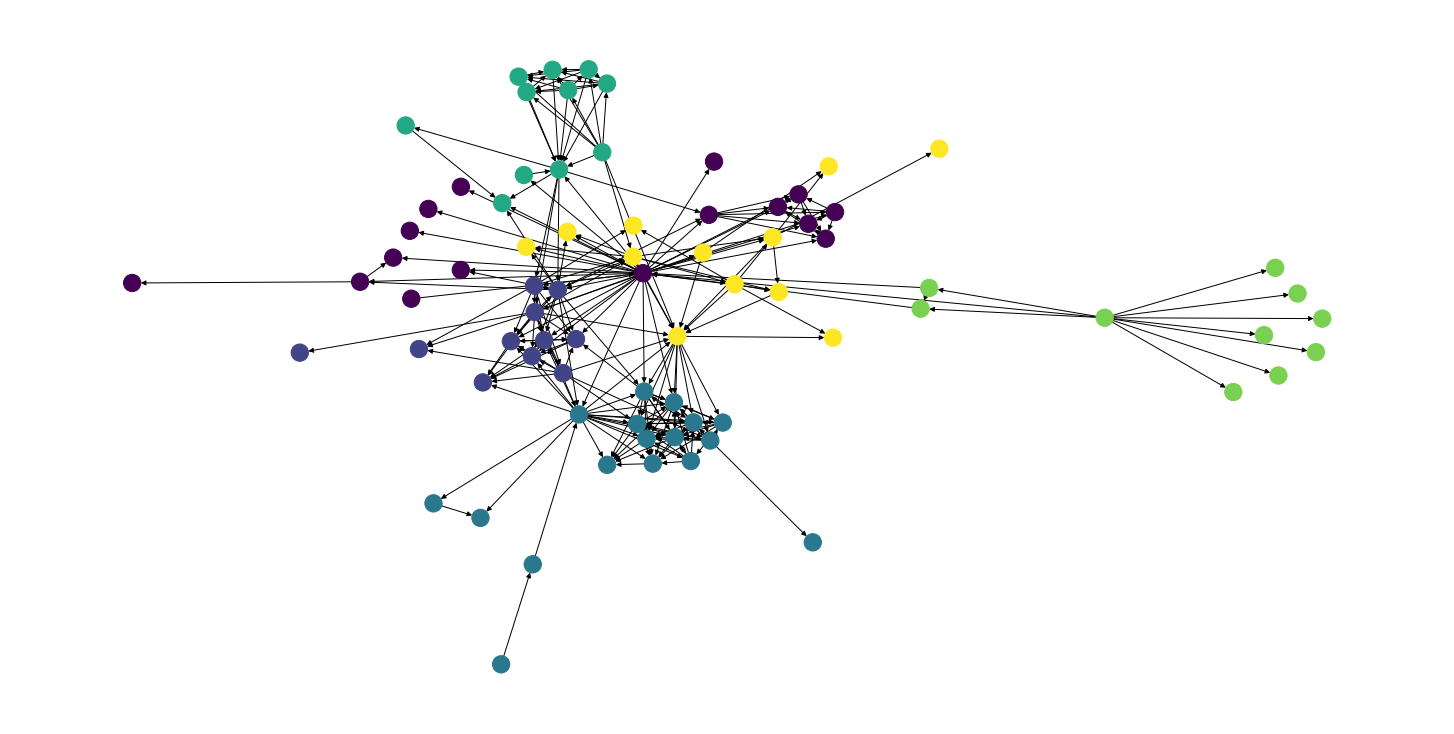

In [23]:
random.seed(2011)
visualizePartition(G,PCG,None)

## Task 2 (World airports). 
### Q1. 
Find connected components, report their number and the sizes.  

### Q2. 
In the largest connected component find and report (print a list of city names and centrality scores) top 10 airports by each centrality metric (degree, betweenneass, closeness, pagerank with $alpha=0.85$). 

### Q3. 
Find maximum and average network distance of the shortest path (number of edges, regardless of size) between all pairs of the airports from the largest connected component. Visualize the shortest path of the maximum length.

### Q4. 
Find average network distance among the top 100 airports by pagerank (with $alpha=0.85$)

### Q5.
Partition the network using Combo algorithm, visualize the partition 


In [24]:
cities = pd.read_csv('citiesTable.csv', index_col=0 )
cities.head()

,country name,most active airport,long. most active airport,lat. most active airport,number of routes,number incoming flights,number outcoming flights,number incoming domestic flights,number outcoming domestic flights,number incoming international flights,number outcoming international flights,only domestic flights,average distance,max. distance
city name,,,,,,,,,,,,,,
London,United Kingdom,Heathrow,-0.103,51.795,1984,993,992,57,57,936,934,0,3228,11153
Chicago,United States,Chicago Ohare Intl,-87.842,42.631,1406,705,702,526,523,179,178,0,2328,12416
Paris,France,Charles De Gaulle,2.916,49.021,1254,626,629,68,68,558,560,0,3367,11652
Moscow,Russia,Domododevo,38.510,55.681,1179,589,591,231,231,358,359,0,2772,10054
Shanghai,China,Pudong,122.342,31.238,1115,560,556,357,353,203,202,0,2235,12245


In [25]:
#create a network with city names as nodes
Flights=nx.Graph()
Flights.add_nodes_from(cities.index)

In [26]:
#now read the links
links = pd.read_csv('citiesToCities.csv' , index_col=None )
links.head()

,departure city,long. departure (decimal),lat. departure (decimal),departure country,arrival city,long. departure (decimal).1,lat. departure (decimal).1,arrival country,number of routes,distance
0,Sao Paulo,-46.116,-23.054,Brazil,Rio De Janeiro,-42.740,-22.682,Brazil,18,348
1,Rio De Janeiro,-42.740,-22.682,Brazil,Sao Paulo,-46.116,-23.054,Brazil,18,348
2,Beijing,116.974,40.133,China,Shanghai,122.342,31.238,China,18,1100
3,Johannesburg,28.410,-25.566,South Africa,Cape Town,19.002,-33.942,South Africa,16,1299
4,Honolulu,-157.871,21.531,United States,Tokyo,140.643,36.274,Japan,16,6103


In [27]:
#create list of edges as tuples
EN=len(links.index)
edgelist=[(links['departure city'][j],links['arrival city'][j]) for j in range(EN)]

In [28]:
#add edges to the network
Flights.add_edges_from(edgelist)

In [37]:
# Q1. Find connected components, report their number and the sizes.

print("Number of connected components:",nx.number_connected_components(Flights))

for component in nx.connected_components(Flights):
    print(len(component))

Number of connected components: 4
2981
3
2
2


In [38]:
# Q2. In the largest connected component find and report (print a list of city names and centrality scores) top 10 airports 
# by each centrality metric (degree, betweenneass, closeness, pagerank with  𝑎𝑙𝑝ℎ𝑎=0.85 ).
Gcc = max(nx.connected_components(Flights), key=len)
giantC = Flights.subgraph(Gcc)

In [41]:
len(giantC)

2981

In [42]:
# defining a function to return the top n values in a dict 
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)
    for i in range(0,tn):
        print('{0}|{1} : {2}'.format(i+1,ind[i],d[ind[i]]))
    return ind

In [43]:
# a) degree centrality;

mc1=dict(nx.degree(giantC))
ind1=topdict(mc1,10)

1|London : 311
2|Paris : 267
3|Frankfurt : 232
4|Moscow : 229
5|Amsterdam : 208
6|Atlanta : 208
7|Chicago : 199
8|Beijing : 184
9|Istanbul : 181
10|Dallas-fort Worth : 181


In [44]:
# b) betweenness centrality;

mc2 = nx.betweenness_centrality(giantC)
ind2=topdict(mc2,10)

1|London : 0.09076727836638496
2|Anchorage : 0.08216371312591912
3|Paris : 0.07784192121669775
4|Moscow : 0.061038019702898835
5|Chicago : 0.05813492835186721
6|Frankfurt : 0.05452341641775677
7|Seattle : 0.052719585605351275
8|Dubai : 0.04644272199874113
9|Tokyo : 0.0458546447882062
10|Toronto : 0.04531466582661801


In [45]:
# c) closeness centrality

mc3 = nx.closeness_centrality(giantC)
ind3=topdict(mc3,10)

1|London : 0.42335559028271064
2|Frankfurt : 0.4174838890445503
3|Paris : 0.41637557635880956
4|Amsterdam : 0.4094531464688101
5|New York : 0.40053763440860213
6|Toronto : 0.39632929910892406
7|Los Angeles : 0.39601328903654487
8|Chicago : 0.3927253558249868
9|Dubai : 0.3926218708827404
10|Newark : 0.38964435146443516


In [46]:
mc4 = nx.pagerank(giantC,0.85)
ind4=topdict(mc4,10)

1|London : 0.006659290961342691
2|Moscow : 0.006409790102955385
3|Paris : 0.006295939941422259
4|Atlanta : 0.005016918307551105
5|Frankfurt : 0.004802779385676399
6|Chicago : 0.0047098249542551355
7|Dallas-fort Worth : 0.004693215881889283
8|Denver : 0.004626422093445785
9|Houston : 0.0043983802140522875
10|Amsterdam : 0.004312131801712508


In [51]:
# Find maximum and average network distance of the shortest path (number of edges, regardless of size) between all pairs of
# the airports from the largest connected component.

allpaths=dict(nx.shortest_path_length(giantC))
# allpathsD=dict(nx.shortest_path_length(giantC,weight='dist'))

In [60]:
print("The average network distance of shortest path:",nx.average_shortest_path_length(giantC))

The average network distance of shortest path: 3.939842942663716


In [58]:
diameter=0; i0=0; j0=0;
for i in allpaths.items():
    for j in i[1].items():
        if j[1]>diameter:
            diameter=j[1]
            i0=i[0]
            j0=j[0]  
print('{0} - {1} : {2}'.format(i0,j0,diameter))

Peawanuck - Santa Terezinha : 12


In [59]:
Lpath=nx.shortest_path(giantC,i0,j0)
Lpath

['Peawanuck',
 'Attawapiskat',
 'Kashechewan',
 'Fort Albany',
 'Moosonee',
 'Timmins',
 'Toronto',
 'Atlanta',
 'Brasilia',
 'Minacu',
 'Gurupi',
 'Sao Felix do Araguaia',
 'Santa Terezinha']

In [63]:
#create a dictionary of city locations
CityPos={c:(cities['long. most active airport'][c],cities['lat. most active airport'][c])
         for c in cities.index}b

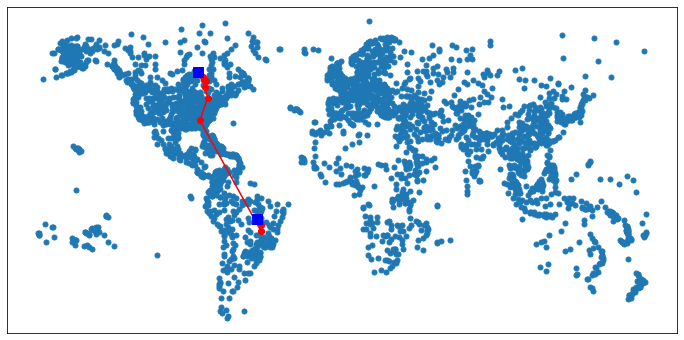

In [69]:
# Visualize the shortest path of the maximum length.
plt.figure(figsize = (12,6))
nx.draw_networkx_nodes(Flights,pos=CityPos,node_size=25)
x=[CityPos[v][0] for v in Lpath]
y=[CityPos[v][1] for v in Lpath]
plt.plot(x,y,'ro-')
plt.plot([x[0],x[-1]],[y[0],y[-1]],'bs',markersize=10)

In [98]:
# Find average network distance among the top 100 airports by pagerank (with  𝑎𝑙𝑝ℎ𝑎=0.85 )
mc5 = nx.pagerank(Flights,0.85)
top_100=sorted(mc5, key=mc5.get, reverse=True)[:100]

In [99]:
G_top_100 = Flights.subgraph(top_100)

In [103]:
print("The average network distance of shortest path for top 100 cities:",nx.average_shortest_path_length(G_top_100))

The average network distance of shortest path for top 100 cities: 1.7375757575757576


In [104]:
# Partition the network using Combo algorithm, visualize the partition

PC_Flights, PC_Flights_mod = pycombo.execute(Flights, max_communities = 0) #combo partition

print("The modularity score of partition by Combo is:",PC_Flights_mod)


The modularity score of partition by Combo is: 0.6606592131112594


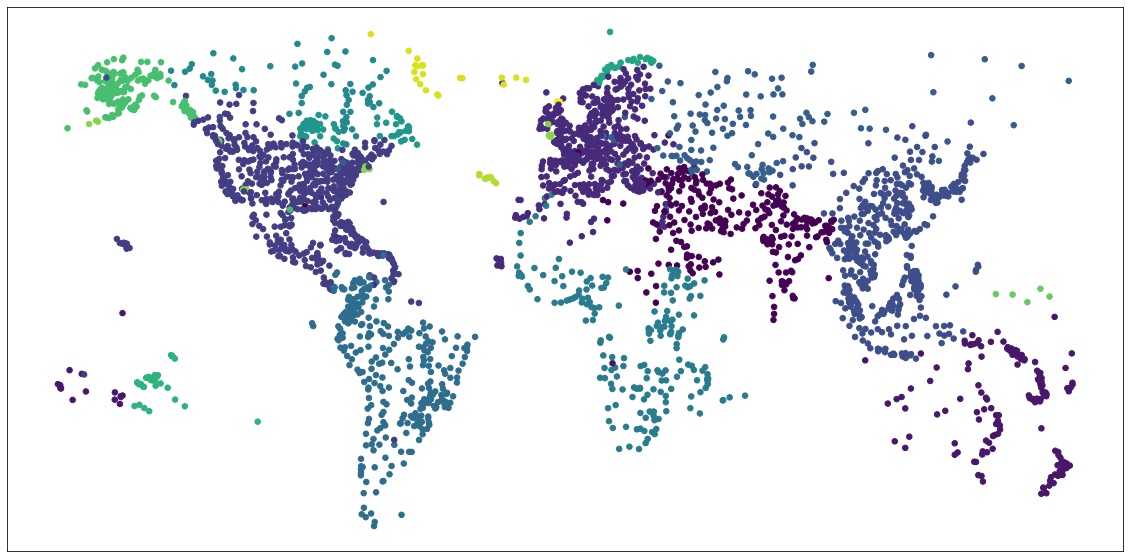

In [112]:
N=len(Flights.nodes())
plt.figure(figsize=(20,10))
PN=max(PC_Flights.values())
my_cmap = matplotlib.cm.hsv(np.linspace(0,1,PN+5)) #create a colormap for a given number of communities
c=[]
for n in Flights.nodes():
    c.append(1.0*PC_Flights[n]/PN)
nx.draw_networkx_nodes(Flights,pos=CityPos,node_size=30,node_color=c)

# Extracredit task 3. Compare weekend and weekday partitions of the taxi network

download ridership data from:https://drive.google.com/drive/folders/198aY_OAeRWWV4odEyB5_iCUog0p5vYnm?usp=sharing

## Q1. 
Aggregate provided daily taxi ridership into a) all weekend and b) all weekday ridership over the year

## Q2. 
Fit a gravity model $$ridership(o,d)\sim k\cdot pop(o) pop(d) travelime(o,d)^{-q}$$ to both networks, compare exponents (use log-scale linear regression with a slope coefficient $-q$ and intercent $\ln(k)$), replace zero ridership edges with a small number $1e-3$ for logarithm feasibility)

## Q3. 
Partition both networks using Combo algorithm, visualize and compare partitions